In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from Kraken API

In [3]:
import krakenex
k = krakenex.API()
res = k.query_public('OHLC', {'pair': 'XETHZEUR', 'interval': 1})

In [4]:
data = res['result']['XETHZEUR']

In [5]:
nb_data = len(data)
open_values = np.array([data[i][1] for i in range(nb_data)], dtype=float)
closing_values = np.array([data[i][4] for i in range(nb_data)], dtype=float)
lowest_values = np.array([data[i][3] for i in range(nb_data)], dtype=float)
highest_values = np.array([data[i][2] for i in range(nb_data)], dtype=float)
av_values = np.array([data[i][5] for i in range(nb_data)], dtype=float)
data_bin = np.array([(closing_values[i] - open_values[i] > 0.) for i in range(nb_data)], dtype=int)

# Transactions BTC-EUR from 01/08/2014

In [6]:
btc_eur = np.loadtxt('krakenEUR.csv', delimiter=',')

In [7]:
# time stamp, price, volume
nb_data = btc_eur.shape[0]
time, price, volume = btc_eur[:,0], btc_eur[:,1], btc_eur[:,2]

In [14]:
#vwap over time interval t
delta_t = 180
init_ind = 95 * (nb_data / 100)
initial_time, final_time = time[init_ind], time[nb_data-1]
time_interval = final_time - initial_time
nb_bins = int(time_interval // delta_t +1)
vwap = np.zeros(nb_bins)
weights = np.zeros(nb_bins)
for j in range(init_ind, nb_data):
    ind = int((time[j]-initial_time)//delta_t)
    vwap[ind] += volume[j] * price[j]
    weights[ind] += volume[j]
for k in range(len(vwap)):
    if weights[k] > 0.0001:
        vwap[k] = vwap[k] / weights[k]
    else:
        vwap[k] = vwap[k-1]

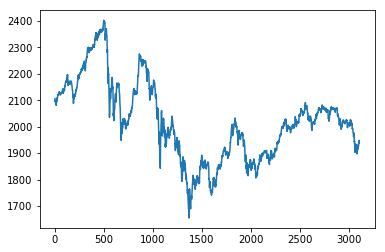

In [15]:
plt.plot(range(nb_bins), vwap)
plt.show()

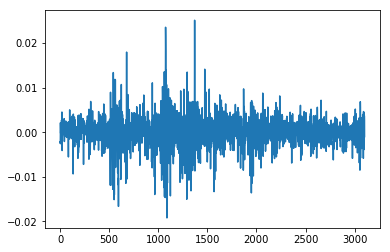

In [16]:
#log returns
y = np.log(vwap[1:]) - np.log(vwap[:nb_bins-1])
plt.plot(y)
plt.show()
#log returns squared
y2 = np.square(y) 

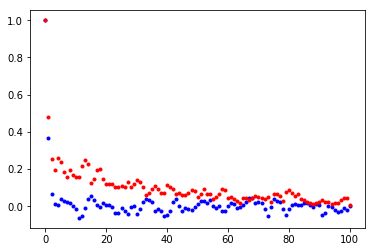

In [17]:
# ACF of log returns
from statsmodels.tsa.stattools import *
acf_y = acf(y, nlags=100)
acf_y2 = acf(y2, nlags=100)
plt.plot(acf_y, 'b .')
plt.plot(acf_y2, 'r .')
plt.show()

In [26]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from arch import arch_model

In [27]:
best_aic = np.inf 
best_order = None
best_mdl = None

pq_rng = range(5) # [0,1,2,3,4]
d_rng = range(2) # [0,1]
for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                tmp_mdl = smt.ARIMA(y, order=(i,d,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


p('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

/Users/jonathan/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonathan/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonathan/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonathan/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


NameError: name 'p' is not defined

In [29]:
best_order

(4, 0, 3)